In [1]:
#importing data set
import kagglehub #kagglehub library, which allows you to download datasets and notebook outputs from Kaggle easily
kazanova_sentiment140_path = kagglehub.dataset_download('kazanova/sentiment140') #Downloads the Sentiment140 dataset (by user kazanova) from Kaggle and stores the path in a variable.
prashant268_sentiment_analysis_lstm_path = kagglehub.notebook_output_download('prashant268/sentiment-analysis-lstm')
#Downloads a notebook output (model) from a Kaggle notebook that likely used an LSTM model for sentiment analysis.

print('Data source import complete.')


Extracting files...
Data source import complete.


In [2]:
import re #Imports regular expressions module, useful for text cleaning (removing links, special characters).
from nltk.corpus import stopwords  #Imports a list of common words (like "the", "is", "and") from NLTK.
import nltk # used for text processing. NLTK (Natural Language Toolkit) library.

In [77]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



import os #library that provide a way to interact with the operating system. used for handling file , reading files and checking file paths.

# List all files in the '/kaggle/input' directory-  /kaggle/input is a special directory on Kaggle where your input datasets are stored.
for filename in os.listdir('/kaggle/input'):
    print(os.path.join('/kaggle/input', filename)) #This prints the full path of each file or folder in the /kaggle/input directory. Each file will be printed on a new line with its full path.

# Any results you write to the current directory are saved as output.

/kaggle/input/sentiment140


In [65]:
df = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv",encoding='latin-1',header=None)
#latin-1 convert unknown sympols to known to be understandable , header = none it means that there is no columns name

**EDA & Data Preprocess**

In [66]:
print(df.shape)
df

(1600000, 6)


,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [67]:
columns=['target','ids','date','flag','user','text']
df.columns=columns

In [68]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [69]:
df.target.replace({0:'Negative',2:'Neutral',4:'Positive'},inplace=True)

<ipython-input-69-144053c49ae6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.target.replace({0:'Negative',2:'Neutral',4:'Positive'},inplace=True)


In [70]:
df.drop_duplicates(subset='text', inplace=True) #in text column
print(df.shape)

(1581466, 6)


In [71]:
df

,target,ids,date,flag,user,text
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,Positive,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,Positive,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,Positive,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,Positive,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


<class 'pandas.core.frame.DataFrame'>
Index: 1581466 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1581466 non-null  object
 1   ids     1581466 non-null  int64 
 2   date    1581466 non-null  object
 3   flag    1581466 non-null  object
 4   user    1581466 non-null  object
 5   text    1581466 non-null  object
dtypes: int64(1), object(5)
memory usage: 84.5+ MB
None
--------------------------------------------------------------------------------------
target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64
--------------------------------------------------------------------------------------
Axes(0.125,0.11;0.775x0.77)
--------------------------------------------------------------------------------------
target
Positive    791281
Negative    790185
Name: count, dtype: int64
--------------------------------------------------------------------------------------
0

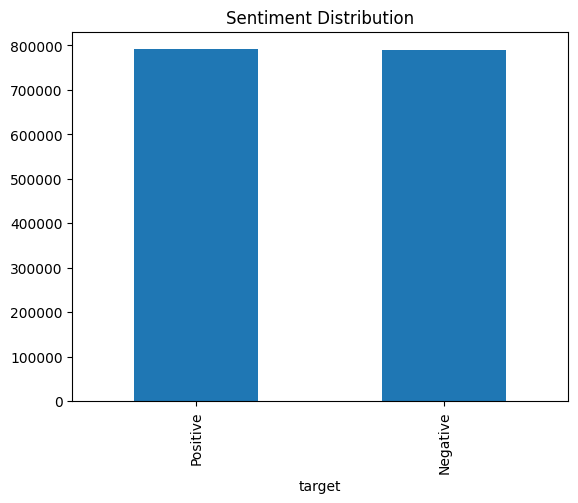

In [72]:
# Get dataset info
print(df.info())
print("--------------------------------------------------------------------------------------")

# Check for missing values
print(df.isnull().sum())
print("--------------------------------------------------------------------------------------")


# Check the distribution of sentiment labels
print(df['target'].value_counts().plot(kind='bar', title='Sentiment Distribution'))
print("--------------------------------------------------------------------------------------")


# Check the distribution of sentiment labels
df['target'].value_counts().plot(kind='bar', title='Sentiment Distribution')
print(df['target'].value_counts())
print("--------------------------------------------------------------------------------------")


# Check the length of tweets
df['tweet_length'] = df['text'].apply(len)
print(df['tweet_length'])
# Get basic stats on tweet length
print(df['tweet_length'].describe())
print("--------------------------------------------------------------------------------------")


# Top 10 users by tweet count
print(df['user'].value_counts().head(10))
print(df['tweet_length'].describe())
print("--------------------------------------------------------------------------------------")

In [73]:
nltk.download('stopwords') #This command downloads a list of stopwords from the NLTK library.
nltk.download('punkt') #Punkt tokenizer,process of breaking up text into smaller units (tokens), which is useful for tasks like text analysis and natural language processing (NLP).

#This line retrieves the list of English stopwords from the NLTK library and converts it into a set.
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [75]:
cleaned_review = []
#This loops through each row in the df using the index of the DataFrame. This allows you to access each tweet's text.
for i in df.index:  # Iterate using df.index instead of range(len(df))
    review = re.sub('@\\S+|https?:\\S+|http?:\\S|[^A-Za-z0-9]+', ' ', df['text'][i]) # Step 1: Clean the text by removing @mentions, URLs, and everything not char or no
    review = review.lower()
    review = review.split()  # Step 3: Split the text into individual words
    review = [word for word in review if not word in stop_words] # This creates a new list containing only the words that are not stopwords.
    review = ' '.join(review)  #After removing stopwords, this joins the remaining words back into a single string with spaces between them.
    cleaned_review.append(review)  # Append the cleaned review to the corpus list

df['text'] = cleaned_review  # Update the dataframe with cleaned text

In [76]:
# Extract datetime features
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour  #extract hour from date
df['day_of_week'] = df['date'].dt.dayofweek #This extracts the day of the week from the date column.  0 is Monday,1 is Tuesday,

# Check the dataset after adding features
df.head()


<ipython-input-76-c5296cb2113a>:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date'] = pd.to_datetime(df['date'])


,target,ids,date,flag,user,text,tweet_length,hour,day_of_week
0,Negative,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,awww bummer shoulda got david carr third day,115,22,0
1,Negative,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset update facebook texting might cry result...,111,22,0
2,Negative,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...,89,22,0
3,Negative,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,whole body feels itchy like fire,47,22,0
4,Negative,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,behaving mad see,111,22,0


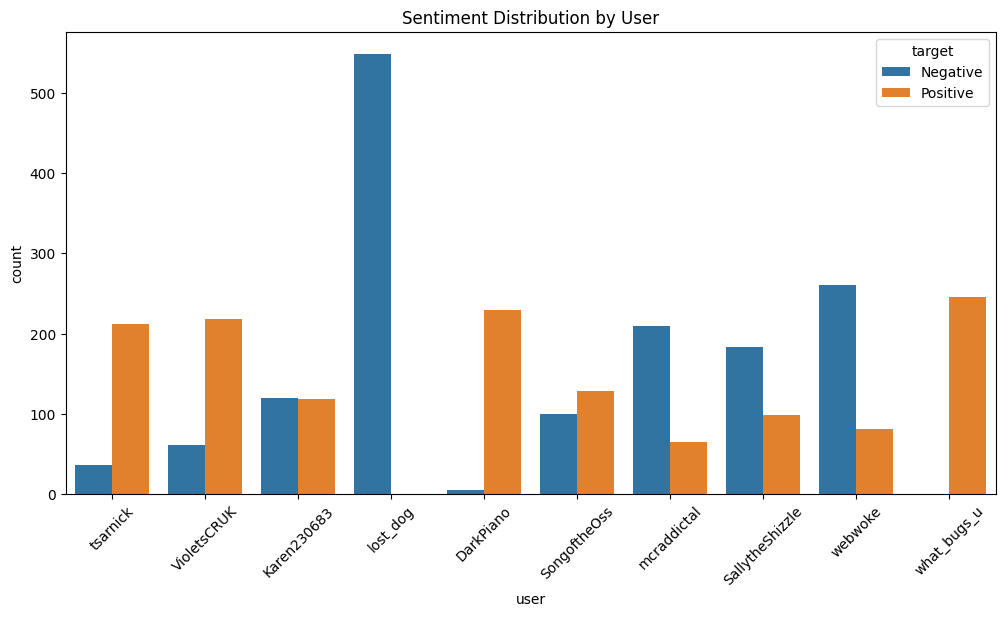

In [82]:
# Plot sentiment distribution by user (Top 10 users)
top_users = df['user'].value_counts().head(10).index
df_top_users = df[df['user'].isin(top_users)]
#This creates a new DataFrame that only contains rows where the user is one of the top 10 most frequent users.

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_users, x='user', hue='target')
plt.title('Sentiment Distribution by User')
plt.xticks(rotation=45)
plt.show()


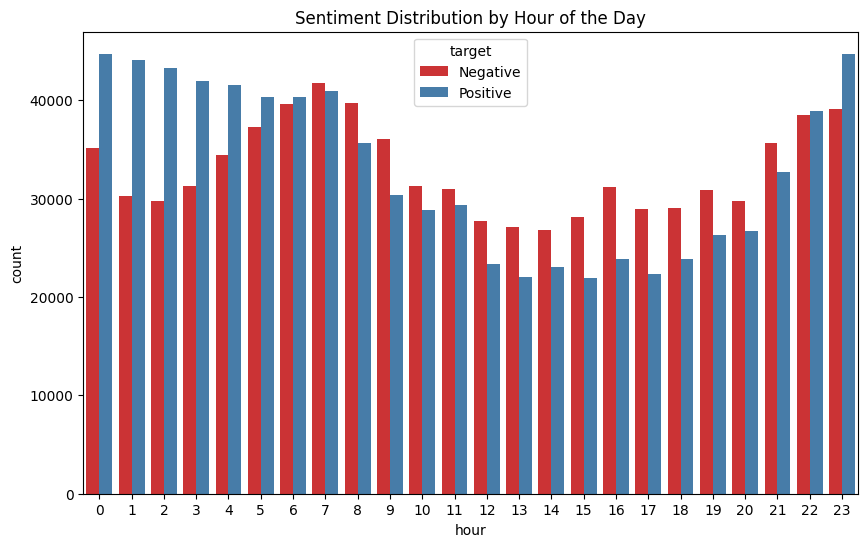

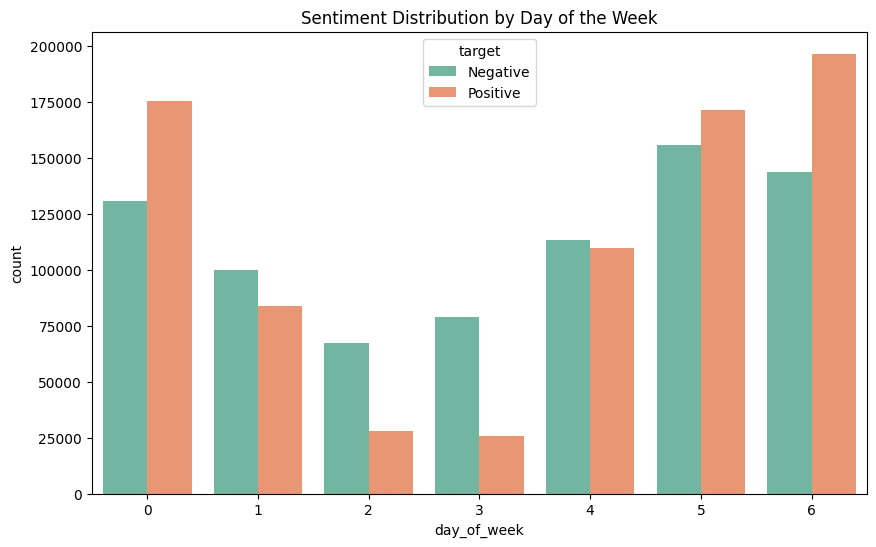

<ipython-input-84-a7f0cba12271>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='tweet_length', data=df, palette='muted')


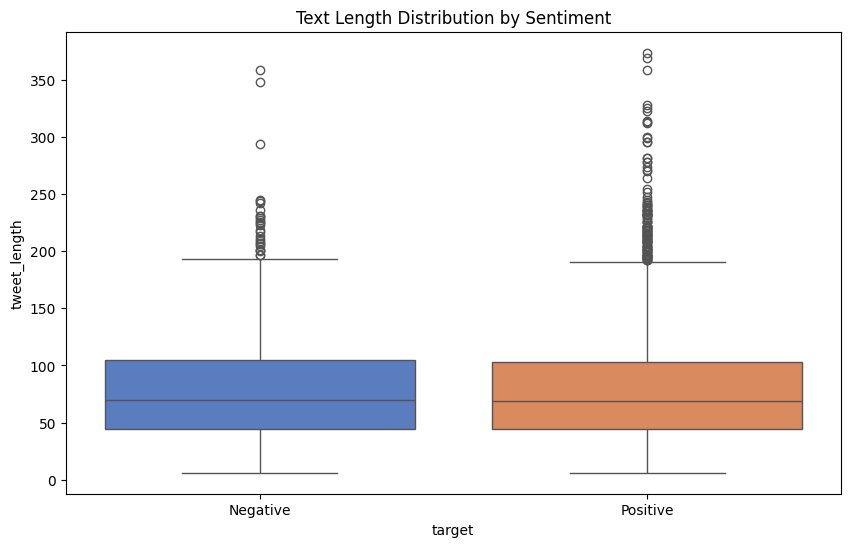

In [84]:
#It shows how sentiment varies by hour of the day.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hour', hue='target', palette='Set1')
plt.title('Sentiment Distribution by Hour of the Day')
plt.show()

#It shows how sentiment varies by day of the week.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', hue='target', palette='Set2')
plt.title('Sentiment Distribution by Day of the Week')
plt.show()

#Text Length Distribution by Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='tweet_length', data=df, palette='muted')
plt.title('Text Length Distribution by Sentiment')
plt.show()

In [89]:
df['date_only'] = df['date'].dt.date #keep month day year only
df.head()

,target,ids,date,flag,user,text,tweet_length,hour,day_of_week,date_only
0,Negative,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,awww bummer shoulda got david carr third day,115,22,0,2009-04-06
1,Negative,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset update facebook texting might cry result...,111,22,0,2009-04-06
2,Negative,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...,89,22,0,2009-04-06
3,Negative,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,whole body feels itchy like fire,47,22,0,2009-04-06
4,Negative,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,behaving mad see,111,22,0,2009-04-06


<Figure size 1400x600 with 0 Axes>

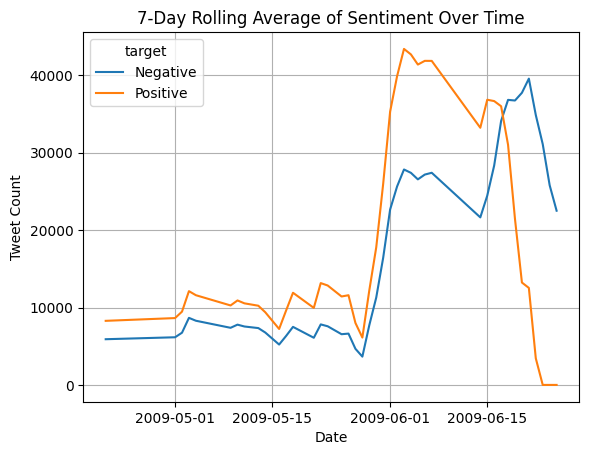

In [92]:
# Average sentiment count per day
daily_sentiment = df.groupby(['date_only', 'target']).size().unstack().fillna(0)
#unstack transforms the sentiment (0 or 1) into columns
#.fillna(0): Fills any missing values with 0 since not every sentiment type might be present for each date.
#each day has x postives y negatives

plt.figure(figsize=(14,6))
daily_sentiment.rolling(7).mean().plot()
plt.title('7-Day Rolling Average of Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.grid()
plt.show()


In [93]:
# Reset index
df.reset_index(drop=True, inplace=True)

# Optional: Remove usernames, hashtags, emojis more cleanly
def final_clean(text):
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#\w+', '', text)  # remove hashtags
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # remove emojis and non-ASCII
    return text.strip()#Extra whitespace removed from the beginning and end of the text.

df['text'] = df['text'].apply(final_clean)


In [94]:
# user1 Love this product! #amazing
# RT @user1: Love this product! #amazing

def remove_retweets_and_mentions(text):
    # Remove retweets (tweets starting with 'RT')
    text = re.sub(r'\bRT\b', '', text)

    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)

    return text

# Apply this function to clean the text further
df['text'] = df['text'].apply(remove_retweets_and_mentions)


In [95]:
def remove_extra_whitespace(text):
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
   # r'\s+': This is a regular expression pattern that matches one or more whitespace characters and change with a single space ' '
    text = text.strip() # removes any extra spaces from the beginning or end of the text.

    return text

# Apply the function to clean the text further
df['text'] = df['text'].apply(remove_extra_whitespace)


In [98]:
def remove_emojis(text):
    # Remove emojis using regex
    text = re.sub(r'[^\w\s,]', '', text)  # remove special characters
#regular expression pattern used to match characters that are not part of words (\w), spaces (\s), or commas (,).
    return text

# Apply the function to remove emojis
df['text'] = df['text'].apply(remove_emojis)


In [100]:
def remove_hashtags(text):
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # #: Matches the hash symbol (#).
    # \w+: Matches one or more word characters (letters, digits, or underscores)
    return text

# Apply the function to remove hashtags
df['text'] = df['text'].apply(remove_hashtags)


In [101]:
df['text'] = df['text'].str.lower()

In [103]:
from nltk.corpus import stopwords

# define a list of custom stopwords, specifically words related to social media or tweets.
additional_stopwords = ['url', 'user', 'retweet', 'tweet']
stop_words = set(stopwords.words('english')).union(set(additional_stopwords))

def remove_stopwords(text):
    tokens = text.split()
    return ' '.join([word for word in tokens if word not in stop_words]) #filters out any word that is in the stop_words

# Apply stopword removal
df['text'] = df['text'].apply(remove_stopwords)


In [104]:
def remove_special_chars_and_numbers(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # re.sub to replace
    return text

# Apply the function to clean the text
df['text'] = df['text'].apply(remove_special_chars_and_numbers)


In [107]:
#most commmon words
#Counter helps count how many times each word appears.
from collections import Counter
all_words = ' '.join(df['text']).split()
#' '.join(df['text']) joins all the tweets together into one long string to count
#.split() breaks that string into a list of individual words
#leh 3mlt join el awel w b3den rg3t 3mlt split tany 3l4an law 3mlt df['text'].split() da 8lt 3l4an da column m4 string h2smo ezay lakn ana b joun 5lethom kolhom fe one string w rg3t a2sm 3leh

#print most repeated words
common_words = Counter(all_words).most_common(20)
print(common_words)

[('good', 89981), ('day', 88196), ('get', 81716), ('like', 78256), ('go', 73347), ('quot', 71373), ('today', 67717), ('love', 64278), ('going', 64055), ('work', 63559), ('got', 60882), ('lol', 59078), ('time', 57516), ('back', 56250), ('u', 55871), ('one', 53691), ('know', 51860), ('im', 50358), ('really', 49613), ('amp', 48240)]


In [ ]:
#remove numbers
df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))

#remove small words like a ,an
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
#[w for w in x.split() if len(w) > 2] keeps only words longer than 2 letter
#This lambda function takes each tweet (x) and processes it

In [109]:
#. Remove empty tweets
df = df[df['text'].str.strip() != '']
#df['text'].str.strip():Removes spaces at the beginning and end of each tweet

In [110]:
#no of words for negative and postive
df.groupby('target')['word_count'].count()


,word_count
target,
Negative,786419
Positive,787290


(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

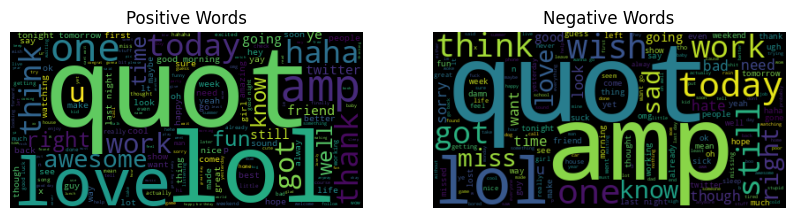

In [117]:
from wordcloud import WordCloud

# Filter out empty strings in 'text' column before joining
pos_words = ' '.join(df[df['target']=='Positive']['text'])
#Filters only the rows where target == 'Positive',
#' '.join(...):This joins all the positive tweets into one large string.

neg_words = ' '.join(df[df['target']=='Negative']['text'])


plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Positive Words")
plt.imshow(WordCloud(width=400, height=200).generate(pos_words))#show image
#.generate:Words that appear more frequently will appear larger in the word cloud.
#bilinear:improves the quality of the image rendering
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Negative Words")
plt.imshow(WordCloud(width=400, height=200).generate(neg_words), interpolation='bilinear')
plt.axis('off')

In [ ]:
#spell correction مش لازم نعملها علشان هتاخد وقت كبير
#from textblob import TextBlob
#df['text'] = df['text'].apply(lambda x: str(TextBlob(x).correct()))